# 02 Basic EDA

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

DATA_SAMPLE = Path("../output/cleaned_data_sample.csv")
#DATA_FULL = Path("../data/2019-Oct.csv")
FIG_DIR = Path("../output/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(DATA_SAMPLE, parse_dates=["event_time"])
#df = pd.read_csv(DATA_FULL, parse_dates=["event_time"])

# 1. 每日 / 每周活跃用户数（DAU, WAU）

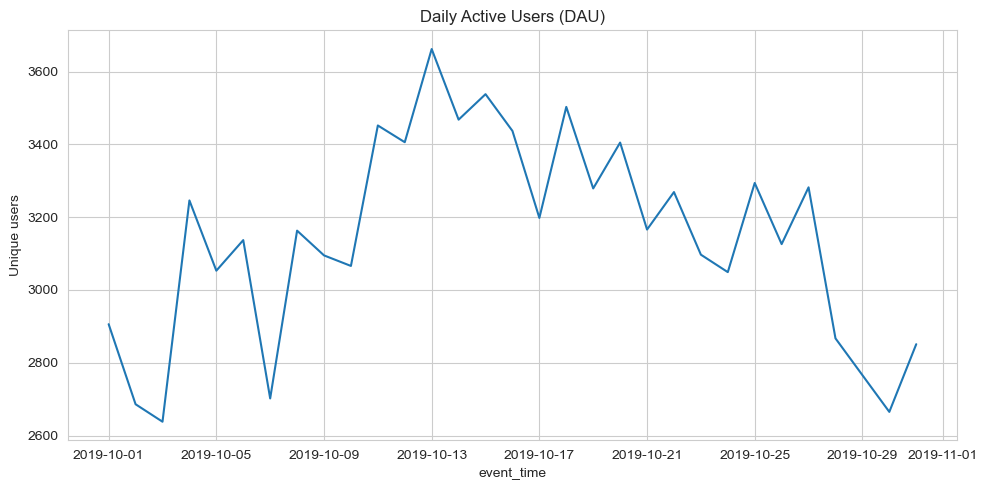

C:\Users\ylzhi\AppData\Local\Temp\ipykernel_12632\2835018028.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  wau = df.groupby(df["event_time"].dt.to_period("W"))["user_id"].nunique()


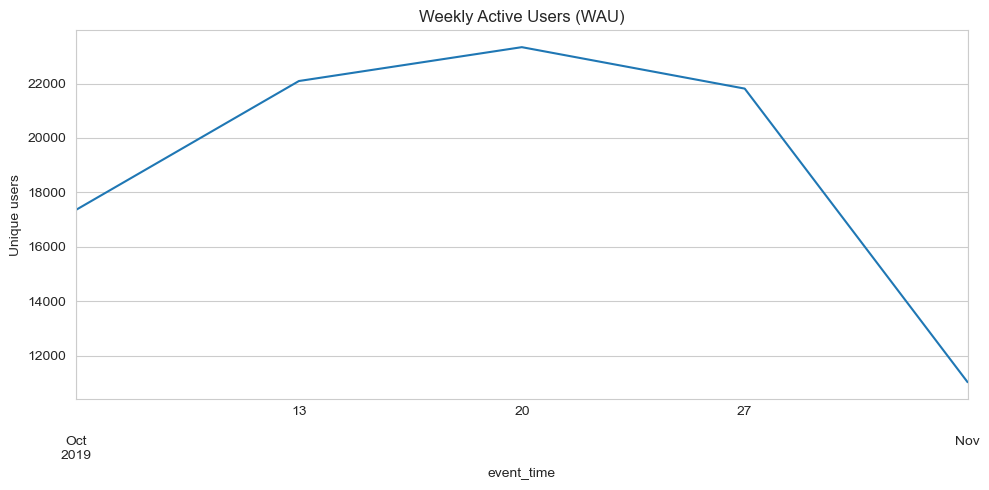

In [2]:

# 按日
dau = df.groupby(df["event_time"].dt.date)["user_id"].nunique()

plt.figure()
dau.plot()
plt.title("Daily Active Users (DAU)")
plt.ylabel("Unique users")
plt.tight_layout()
plt.savefig(FIG_DIR / "dau.png")
plt.show()

# 按周
wau = df.groupby(df["event_time"].dt.to_period("W"))["user_id"].nunique()
plt.figure()
wau.plot()
plt.title("Weekly Active Users (WAU)")
plt.ylabel("Unique users")
plt.tight_layout()
plt.savefig(FIG_DIR / "wau.png")
plt.show()


# 2. 不同行为事件的趋势

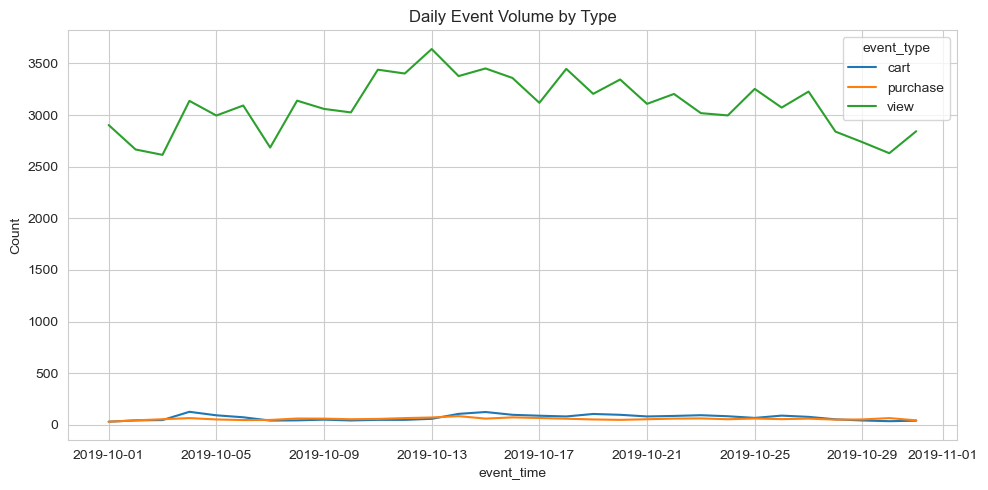

In [3]:

events_daily = (
    df.groupby([df["event_time"].dt.date, "event_type"])
      .size()
      .unstack(fill_value=0)
)

events_daily.plot()
plt.title("Daily Event Volume by Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(FIG_DIR / "event_trends.png")
plt.show()


# 3. 日漏斗转化率

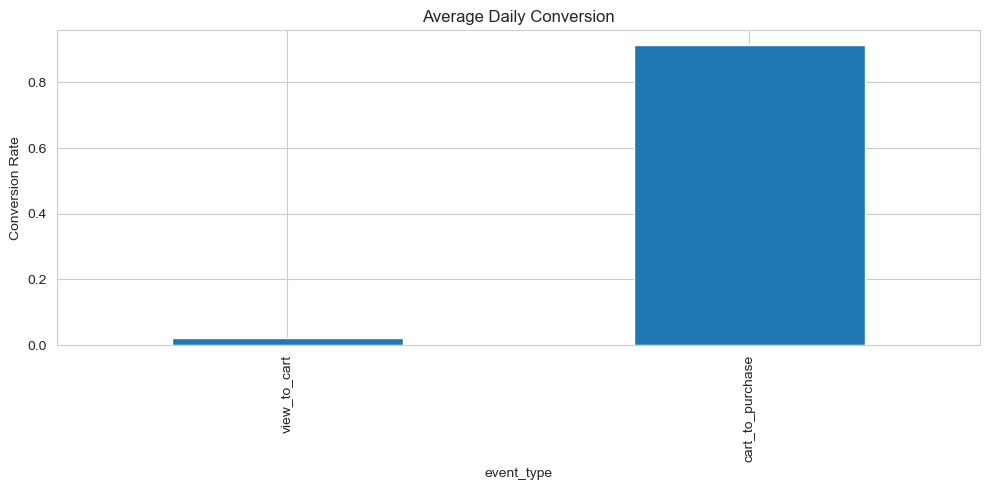

In [4]:

funnel_daily = events_daily.assign(
    view_to_cart=lambda x: x["cart"] / x["view"],
    cart_to_purchase=lambda x: x["purchase"] / x["cart"]
)[["view_to_cart", "cart_to_purchase"]]

#funnel_daily.describe(percentiles=[.25, .5, .75])

#并画柱状图示例（可取均值或中位数）
funnel_avg = funnel_daily.mean()
funnel_avg.plot(kind="bar")
plt.ylabel("Conversion Rate")
plt.title("Average Daily Conversion")
plt.tight_layout()
plt.savefig(FIG_DIR / "avg_conversion.png")
plt.show()



# 4. 热门品类 & 品牌

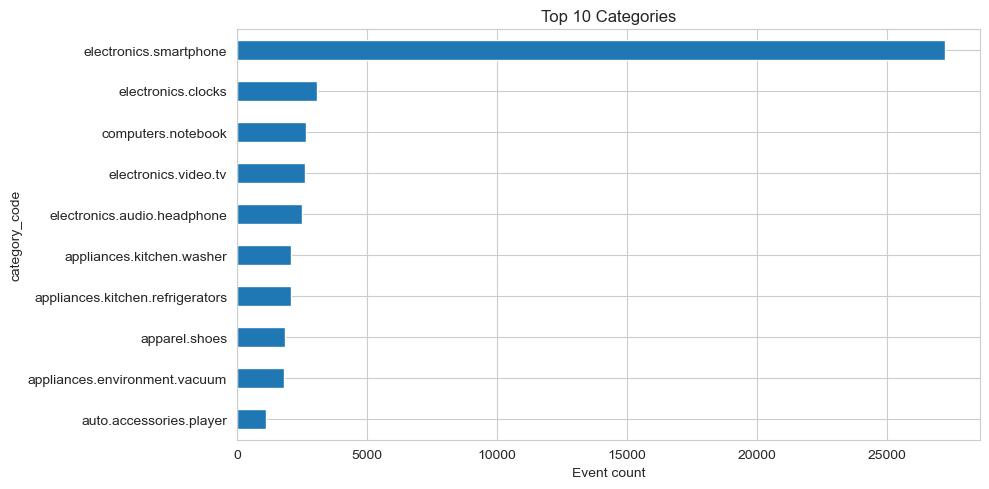

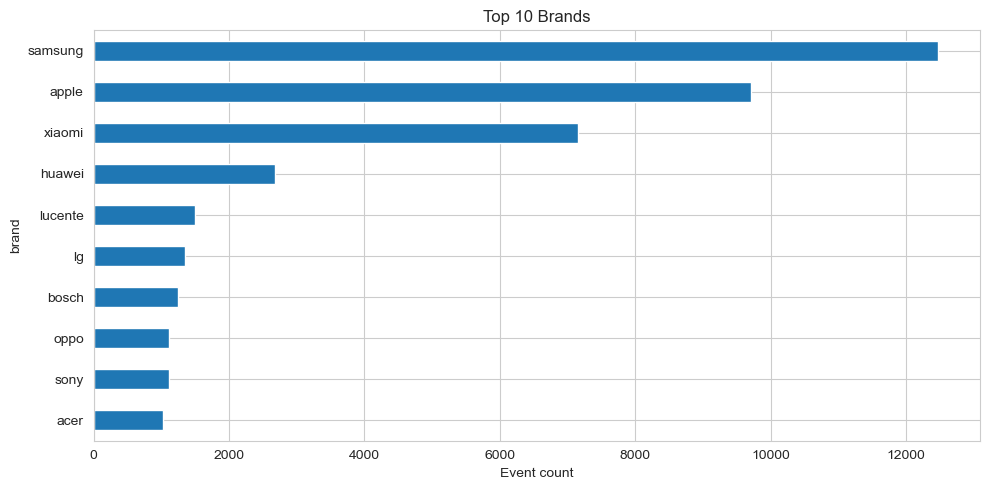

In [5]:

top_cat = (df["category_code"]
           .value_counts()
           .head(10)
           .sort_values(ascending=True))

plt.figure()
top_cat.plot(kind="barh")
plt.title("Top 10 Categories")
plt.xlabel("Event count")
plt.tight_layout()
plt.savefig(FIG_DIR / "top_categories.png")
plt.show()

top_brand = (df["brand"]
             .value_counts()
             .head(10)
             .sort_values(ascending=True))

plt.figure()
top_brand.plot(kind="barh")
plt.title("Top 10 Brands")
plt.xlabel("Event count")
plt.tight_layout()
plt.savefig(FIG_DIR / "top_brands.png")
plt.show()
